In [3]:
!pip install openmeteo-requests
!pip install requests-cache retry-requests numpy pandas

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/61.4 kB ? eta -:--:--
   -------------------- ------------------- 30.7/61.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 61.4/61.4 kB 1.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
   ---------------------------------------- 57.5/57.5 kB 1.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import openmeteo_requests
import requests_cache
import pandas as pd
from retry_requests import retry

In [5]:
# Setup the Open-Meteo API client with cache and retry on error
cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
openmeteo = openmeteo_requests.Client(session = retry_session)

# Make sure all required weather variables are listed here
# The order of variables in hourly or daily is important to assign them correctly below
url = "https://archive-api.open-meteo.com/v1/archive"
params = {
	"latitude": 43.7001,
	"longitude": -79.4163,
	"start_date": "2022-01-01",
	"end_date": "2023-12-31",
	"daily": ["weather_code", "temperature_2m_mean", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max"],
	"timezone": "America/New_York"
}
responses = openmeteo.weather_api(url, params=params)
# Process first location. Add a for-loop for multiple locations or weather models
response = responses[0]
print(f"Coordinates {response.Latitude()}°N {response.Longitude()}°E")
print(f"Elevation {response.Elevation()} m asl")
print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")

# Process daily data. The order of variables needs to be the same as requested.
daily = response.Daily()
daily_weather_code = daily.Variables(0).ValuesAsNumpy()
daily_temperature_2m_mean = daily.Variables(1).ValuesAsNumpy()
daily_precipitation_sum = daily.Variables(2).ValuesAsNumpy()
daily_rain_sum = daily.Variables(3).ValuesAsNumpy()
daily_snowfall_sum = daily.Variables(4).ValuesAsNumpy()
daily_precipitation_hours = daily.Variables(5).ValuesAsNumpy()
daily_wind_speed_10m_max = daily.Variables(6).ValuesAsNumpy()
daily_wind_gusts_10m_max = daily.Variables(7).ValuesAsNumpy()

daily_data = {"date": pd.date_range(
	start = pd.to_datetime(daily.Time(), unit = "s", utc = True),
	end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
	freq = pd.Timedelta(seconds = daily.Interval()),
	inclusive = "left"
)}
daily_data["weather_code"] = daily_weather_code
daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
daily_data["precipitation_sum"] = daily_precipitation_sum
daily_data["rain_sum"] = daily_rain_sum
daily_data["snowfall_sum"] = daily_snowfall_sum
daily_data["precipitation_hours"] = daily_precipitation_hours
daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max

daily_dataframe = pd.DataFrame(data = daily_data)

Coordinates 43.6906852722168°N -79.4117431640625°E
Elevation 175.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s


In [111]:
#sometimes it's more convenient to look at DFs with these settings
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_colwidth', None)

In [8]:
#df_readme = pd.read_excel('stats project UofT/ttc-bus-delay-data-readme.xlsx')
#df_readme

In [10]:
df22 = pd.read_excel('ttc-bus-delay-data-2022.xlsx')
df23 = pd.read_excel('ttc-bus-delay-data-2023.xlsx')

In [11]:
df22.head(20)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,General Delay,0,0,NaN,8531
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,Diversion,131,161,W,8658
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,Operations - Operator,17,20,S,0
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,Operations - Operator,4,11,S,0
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,Operations - Operator,4,8,S,0
5,2022-01-01,363,02:16,Saturday,KING AND SHAW,Operations - Operator,30,60,NaN,0
6,2022-01-01,96,02:18,Saturday,HUMBERLINE LOOP,Security,0,0,N,3536
7,2022-01-01,320,02:38,Saturday,STEELES AND YONGE,Operations - Operator,4,8,NaN,0
8,2022-01-01,320,02:55,Saturday,YONGE AND STEELES,Operations - Operator,4,8,NaN,0
9,2022-01-01,300,03:18,Saturday,KENNEDY STATION,Emergency Services,0,0,E,8094


In [115]:
df23.head(20)

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
0,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
1,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
2,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
3,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
4,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
5,2023-01-01,40,03:47,Sunday,KIPLING STATION,Emergency Services,0,0,NaN,0
6,2023-01-01,336,03:52,Sunday,FINCH AND ALNESS,Diversion,138,168,NaN,9220
7,2023-01-01,52,04:25,Sunday,LAWRENCE AND YONGE,Emergency Services,30,60,E,3520
8,2023-01-01,24,04:35,Sunday,DANFORTH AND MAIN,Cleaning - Unsanitary,20,40,W,8404
9,2023-01-01,36,05:18,Sunday,FINCH AND ALNESS,Diversion,334,344,NaN,3524


In [12]:
df22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58707 entries, 0 to 58706
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       58707 non-null  datetime64[ns]
 1   Route      58323 non-null  object        
 2   Time       58707 non-null  object        
 3   Day        58707 non-null  object        
 4   Location   58707 non-null  object        
 5   Incident   58707 non-null  object        
 6   Min Delay  58707 non-null  int64         
 7   Min Gap    58707 non-null  int64         
 8   Direction  48227 non-null  object        
 9   Vehicle    58707 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 4.5+ MB


In [13]:
df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56207 entries, 0 to 56206
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       56207 non-null  datetime64[ns]
 1   Route      55637 non-null  object        
 2   Time       56207 non-null  object        
 3   Day        56207 non-null  object        
 4   Location   56207 non-null  object        
 5   Incident   56207 non-null  object        
 6   Min Delay  56207 non-null  int64         
 7   Min Gap    56207 non-null  int64         
 8   Direction  46667 non-null  object        
 9   Vehicle    56207 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 4.3+ MB


**Same columns, same formats**

In [14]:
df22.describe()

,Date,Min Delay,Min Gap,Vehicle
count,58707,58707.000000,58707.000000,58707.000000
mean,2022-07-03 11:48:01.066993664,20.115353,32.676154,5467.459298
min,2022-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2022-04-06 00:00:00,9.000000,17.000000,1553.000000
50%,2022-07-13 00:00:00,11.000000,22.000000,7959.000000
75%,2022-09-27 00:00:00,20.000000,36.000000,8546.000000
max,2022-12-31 00:00:00,999.000000,999.000000,93561.000000
std,NaN,48.945121,50.636856,4356.685772


In [15]:
df23.describe()

,Date,Min Delay,Min Gap,Vehicle
count,56207,56207.000000,56207.000000,56207.000000
mean,2023-07-13 15:27:51.870051840,20.251606,32.897557,5576.547370
min,2023-01-01 00:00:00,0.000000,0.000000,0.000000
25%,2023-04-15 00:00:00,9.000000,17.000000,3155.000000
50%,2023-07-23 00:00:00,11.000000,21.000000,7270.000000
75%,2023-10-12 00:00:00,20.000000,40.000000,8545.000000
max,2023-12-31 00:00:00,998.000000,992.000000,91024.000000
std,NaN,50.170167,52.287433,3741.874633


In [16]:
[df22['Incident'].unique().size, df23['Incident'].unique().size]

[15, 13]

**Shared categories will go into ANOVA**

In [17]:
delay_categories_22 = list(df22['Incident'].unique())
delay_categories_23 = list(df23['Incident'].unique())
shared_categories_22_23 = list(set(delay_categories_22).intersection(set(delay_categories_23)))
not_shared_categories_22_23 = list(set(delay_categories_22).symmetric_difference(set(delay_categories_23)))
shared_categories_22_23

['Held By',
 'Mechanical',
 'Investigation',
 'General Delay',
 'Security',
 'Utilized Off Route',
 'Collision - TTC',
 'Road Blocked - NON-TTC Collision',
 'Emergency Services',
 'Operations - Operator',
 'Diversion',
 'Vision',
 'Cleaning - Unsanitary']

**Both 'Late Entering Service' and 'Cleaning - Disinfection' have significant size in 2023, though they are not in 2022. I will create dummies for them as well**

In [18]:
df22[df22['Incident'] == 'Cleaning - Disinfection']

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
2488,2022-01-12,47,13:41,Wednesday,CALEDONIA AND BRIDGELA,Cleaning - Disinfection,247,259,W,8368
5138,2022-01-26,165,16:24,Wednesday,WESTON AND STEELES,Cleaning - Disinfection,244,253,N,3714
6872,2022-02-07,34,18:31,Monday,EGLINTON STATION,Cleaning - Disinfection,9,17,W,8790
14963,2022-04-08,52,23:48,Friday,LAWRENCE WEST STATION,Cleaning - Disinfection,20,40,E,8134
26442,2022-06-24,168,21:10,Friday,DAVENPORT AND SYMINGTO,Cleaning - Disinfection,7,14,NaN,1259
33363,2022-07-31,35,16:51,Sunday,JANE AND SHPPARD,Cleaning - Disinfection,9,17,N,1056


In [19]:
df22[df22['Incident'] == 'Late Entering Service']

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
3224,2022-01-17,95,02:28,Monday,SHEPPARD STATION,Late Entering Service,14,0,E,3448
4586,2022-01-23,86,14:11,Sunday,KENNEDY STATION,Late Entering Service,9,18,E,3462
5050,2022-01-26,954,06:17,Wednesday,LAWRENCE EAST STATION,Late Entering Service,8,0,E,0
5132,2022-01-26,36,15:37,Wednesday,FINCH WEST STATION,Late Entering Service,25,50,NaN,3608
7722,2022-02-14,91,05:00,Monday,2 ALVARADO PLACE,Late Entering Service,24,48,W,8655
9854,2022-03-01,90,05:11,Tuesday,WILSON GARAGE,Late Entering Service,20,20,S,8192
10494,2022-03-06,80,15:08,Sunday,THE QUEENSWAY AND KIPL,Late Entering Service,24,48,E,8070
10683,2022-03-08,98,05:28,Tuesday,WILSON GARAGE,Late Entering Service,30,30,S,8163
11147,2022-03-11,320,01:43,Friday,YONGE AND STEELES,Late Entering Service,20,26,S,8354
13866,2022-03-31,74,17:50,Thursday,ST CLAIR STATION,Late Entering Service,20,40,W,8702


In [20]:
daily_dataframe

,date,weather_code,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max
0,2022-01-01 04:00:00+00:00,73.0,2.319333,2.800000,0.400000,1.68,9.0,20.907913,36.000000
1,2022-01-02 04:00:00+00:00,73.0,-6.297333,6.000000,0.000000,4.20,14.0,22.264771,39.239998
2,2022-01-03 04:00:00+00:00,3.0,-9.074418,0.000000,0.000000,0.00,0.0,16.981165,29.160000
3,2022-01-04 04:00:00+00:00,3.0,-2.722333,0.000000,0.000000,0.00,0.0,21.398056,37.079998
4,2022-01-05 04:00:00+00:00,51.0,1.611000,0.800000,0.800000,0.00,5.0,35.221176,64.079994
...,...,...,...,...,...,...,...,...,...
725,2023-12-27 04:00:00+00:00,63.0,6.240167,20.000002,20.000002,0.00,19.0,17.253731,31.319998
726,2023-12-28 04:00:00+00:00,53.0,6.121417,3.800000,3.800000,0.00,14.0,15.790833,28.440001
727,2023-12-29 04:00:00+00:00,55.0,5.406834,5.800000,5.800000,0.00,18.0,15.986595,29.879999
728,2023-12-30 04:00:00+00:00,51.0,0.463083,0.200000,0.200000,0.00,2.0,16.965895,30.960001


What I need to do:

Merge 22 and 23 into one

get dummies for merged df

group by days

merge with weather data

In [21]:
merged_delays_df = pd.concat([df22, df23], ignore_index=True)

In [22]:
merged_delays_df[58704:58720] #to check the border

,Date,Route,Time,Day,Location,Incident,Min Delay,Min Gap,Direction,Vehicle
58704,2022-12-31,72,23:56,Saturday,LOWER SHERBOURNE AND L,Security,18,36,N,8493
58705,2022-12-31,22,00:17,Saturday,BINGHAM LOOP,Cleaning - Unsanitary,10,20,S,8582
58706,2022-12-31,7,00:28,Saturday,BATHURST STATION,General Delay,10,20,N,8354
58707,2023-01-01,91,02:30,Sunday,WOODBINE AND MORTIMER,Diversion,81,111,NaN,8772
58708,2023-01-01,69,02:34,Sunday,WARDEN STATION,Security,22,44,S,8407
58709,2023-01-01,35,03:06,Sunday,JANE STATION,Cleaning - Unsanitary,30,60,N,1051
58710,2023-01-01,900,03:14,Sunday,KIPLING STATION,Security,17,17,NaN,3334
58711,2023-01-01,85,03:43,Sunday,MEADOWALE LOOP,Security,1,1,NaN,1559
58712,2023-01-01,40,03:47,Sunday,KIPLING STATION,Emergency Services,0,0,NaN,0
58713,2023-01-01,336,03:52,Sunday,FINCH AND ALNESS,Diversion,138,168,NaN,9220


In [24]:
merged_delays_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114914 entries, 0 to 114913
Data columns (total 10 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       114914 non-null  datetime64[ns]
 1   Route      113960 non-null  object        
 2   Time       114914 non-null  object        
 3   Day        114914 non-null  object        
 4   Location   114914 non-null  object        
 5   Incident   114914 non-null  object        
 6   Min Delay  114914 non-null  int64         
 7   Min Gap    114914 non-null  int64         
 8   Direction  94894 non-null   object        
 9   Vehicle    114914 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 8.8+ MB


In [25]:
merged_df_dummies = pd.get_dummies(merged_delays_df, columns=['Incident'])

In [26]:
merged_df_dummies.head()

,Date,Route,Time,Day,Location,Min Delay,Min Gap,Direction,Vehicle,Incident_Cleaning - Disinfection,...,Incident_General Delay,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision
0,2022-01-01,320,02:00,Saturday,YONGE AND DUNDAS,0,0,NaN,8531,False,...,True,False,False,False,False,False,False,False,False,False
1,2022-01-01,325,02:00,Saturday,OVERLEA AND THORCLIFFE,131,161,W,8658,False,...,False,False,False,False,False,False,False,False,False,False
2,2022-01-01,320,02:00,Saturday,YONGE AND STEELES,17,20,S,0,False,...,False,False,False,False,False,True,False,False,False,False
3,2022-01-01,320,02:07,Saturday,YONGE AND STEELES,4,11,S,0,False,...,False,False,False,False,False,True,False,False,False,False
4,2022-01-01,320,02:13,Saturday,YONGE AND STEELES,4,8,S,0,False,...,False,False,False,False,False,True,False,False,False,False


In [27]:
merged_df_dummies.columns

Index(['Date', 'Route', 'Time', 'Day', 'Location', 'Min Delay', 'Min Gap',
       'Direction', 'Vehicle', 'Incident_Cleaning - Disinfection',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations - Operator',
       'Incident_Road Blocked - NON-TTC Collision', 'Incident_Security',
       'Incident_Utilized Off Route', 'Incident_Vision'],
      dtype='object')

In [28]:
incident_columns = ['Incident_Cleaning - Disinfection',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations - Operator',
       'Incident_Road Blocked - NON-TTC Collision', 'Incident_Security',
       'Incident_Utilized Off Route', 'Incident_Vision']

In [29]:
df_daily = merged_df_dummies.groupby('Date')[incident_columns].sum().reset_index()

In [30]:
df_daily['Total Incidents'] = df_daily[incident_columns].sum(axis=1)

In [31]:
merged_df = pd.concat([daily_dataframe, df_daily], axis=1)

In [32]:
merged_df = merged_df.rename(columns={'date': 'date_from_weather'})
merged_df

,date_from_weather,weather_code,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,Date,...,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision,Total Incidents
0,2022-01-01 04:00:00+00:00,73.0,2.319333,2.800000,0.400000,1.68,9.0,20.907913,36.000000,2022-01-01,...,0,1,0,21,87,1,10,7,1,144
1,2022-01-02 04:00:00+00:00,73.0,-6.297333,6.000000,0.000000,4.20,14.0,22.264771,39.239998,2022-01-02,...,0,1,0,41,64,1,6,6,1,131
2,2022-01-03 04:00:00+00:00,3.0,-9.074418,0.000000,0.000000,0.00,0.0,16.981165,29.160000,2022-01-03,...,0,4,0,55,182,5,3,5,0,282
3,2022-01-04 04:00:00+00:00,3.0,-2.722333,0.000000,0.000000,0.00,0.0,21.398056,37.079998,2022-01-04,...,0,0,0,36,157,1,9,1,1,226
4,2022-01-05 04:00:00+00:00,51.0,1.611000,0.800000,0.800000,0.00,5.0,35.221176,64.079994,2022-01-05,...,0,1,0,48,205,0,17,6,1,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27 04:00:00+00:00,63.0,6.240167,20.000002,20.000002,0.00,19.0,17.253731,31.319998,2023-12-27,...,0,5,0,62,70,1,11,5,2,190
726,2023-12-28 04:00:00+00:00,53.0,6.121417,3.800000,3.800000,0.00,14.0,15.790833,28.440001,2023-12-28,...,0,1,0,55,31,0,13,1,0,143
727,2023-12-29 04:00:00+00:00,55.0,5.406834,5.800000,5.800000,0.00,18.0,15.986595,29.879999,2023-12-29,...,0,3,0,60,70,1,8,4,0,183
728,2023-12-30 04:00:00+00:00,51.0,0.463083,0.200000,0.200000,0.00,2.0,16.965895,30.960001,2023-12-30,...,2,5,0,65,60,1,17,7,4,195


In [33]:
merged_df = merged_df.rename(columns={'Date': 'date_from_ttc'})
merged_df

,date_from_weather,weather_code,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,date_from_ttc,...,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision,Total Incidents
0,2022-01-01 04:00:00+00:00,73.0,2.319333,2.800000,0.400000,1.68,9.0,20.907913,36.000000,2022-01-01,...,0,1,0,21,87,1,10,7,1,144
1,2022-01-02 04:00:00+00:00,73.0,-6.297333,6.000000,0.000000,4.20,14.0,22.264771,39.239998,2022-01-02,...,0,1,0,41,64,1,6,6,1,131
2,2022-01-03 04:00:00+00:00,3.0,-9.074418,0.000000,0.000000,0.00,0.0,16.981165,29.160000,2022-01-03,...,0,4,0,55,182,5,3,5,0,282
3,2022-01-04 04:00:00+00:00,3.0,-2.722333,0.000000,0.000000,0.00,0.0,21.398056,37.079998,2022-01-04,...,0,0,0,36,157,1,9,1,1,226
4,2022-01-05 04:00:00+00:00,51.0,1.611000,0.800000,0.800000,0.00,5.0,35.221176,64.079994,2022-01-05,...,0,1,0,48,205,0,17,6,1,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27 04:00:00+00:00,63.0,6.240167,20.000002,20.000002,0.00,19.0,17.253731,31.319998,2023-12-27,...,0,5,0,62,70,1,11,5,2,190
726,2023-12-28 04:00:00+00:00,53.0,6.121417,3.800000,3.800000,0.00,14.0,15.790833,28.440001,2023-12-28,...,0,1,0,55,31,0,13,1,0,143
727,2023-12-29 04:00:00+00:00,55.0,5.406834,5.800000,5.800000,0.00,18.0,15.986595,29.879999,2023-12-29,...,0,3,0,60,70,1,8,4,0,183
728,2023-12-30 04:00:00+00:00,51.0,0.463083,0.200000,0.200000,0.00,2.0,16.965895,30.960001,2023-12-30,...,2,5,0,65,60,1,17,7,4,195


In [35]:
#merged_df_no_datetime = merged_df.copy()
#merged_df_no_datetime['date_from_weather'] = merged_df_no_datetime['date_from_weather'].astype(str)
#merged_df_no_datetime['date_from_ttc'] = merged_df_no_datetime['date_from_ttc'].astype(str)

In [36]:
#merged_df_no_datetime.info()

In [139]:
#merged_df_no_datetime.to_excel('fully_merged.xlsx')

In [37]:
merged_df

,date_from_weather,weather_code,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,date_from_ttc,...,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision,Total Incidents
0,2022-01-01 04:00:00+00:00,73.0,2.319333,2.800000,0.400000,1.68,9.0,20.907913,36.000000,2022-01-01,...,0,1,0,21,87,1,10,7,1,144
1,2022-01-02 04:00:00+00:00,73.0,-6.297333,6.000000,0.000000,4.20,14.0,22.264771,39.239998,2022-01-02,...,0,1,0,41,64,1,6,6,1,131
2,2022-01-03 04:00:00+00:00,3.0,-9.074418,0.000000,0.000000,0.00,0.0,16.981165,29.160000,2022-01-03,...,0,4,0,55,182,5,3,5,0,282
3,2022-01-04 04:00:00+00:00,3.0,-2.722333,0.000000,0.000000,0.00,0.0,21.398056,37.079998,2022-01-04,...,0,0,0,36,157,1,9,1,1,226
4,2022-01-05 04:00:00+00:00,51.0,1.611000,0.800000,0.800000,0.00,5.0,35.221176,64.079994,2022-01-05,...,0,1,0,48,205,0,17,6,1,298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27 04:00:00+00:00,63.0,6.240167,20.000002,20.000002,0.00,19.0,17.253731,31.319998,2023-12-27,...,0,5,0,62,70,1,11,5,2,190
726,2023-12-28 04:00:00+00:00,53.0,6.121417,3.800000,3.800000,0.00,14.0,15.790833,28.440001,2023-12-28,...,0,1,0,55,31,0,13,1,0,143
727,2023-12-29 04:00:00+00:00,55.0,5.406834,5.800000,5.800000,0.00,18.0,15.986595,29.879999,2023-12-29,...,0,3,0,60,70,1,8,4,0,183
728,2023-12-30 04:00:00+00:00,51.0,0.463083,0.200000,0.200000,0.00,2.0,16.965895,30.960001,2023-12-30,...,2,5,0,65,60,1,17,7,4,195


<span style="font-size:larger;"><strong>Statiscical inference</strong></span>

FIRST TEST - is there a difference in total incidents of delays in days with good and bad weathaer

Bad weather methodology (WMO Weather interpretation codes):
51, 53, 55 - dizzle56, 
57 - freezing dizzle61, 63, 
65 y rai66, n
67vy freezing ra71, 73, in 
avy snowfall
77 - Snow gr80, 81, ainsolent rain sh85, owers
86 - heavy show 
Good weathaer - everything elseshower


In [130]:
# Define the conditions for good and bad weather
bad_weather_codes = [55, 57, 65, 67, 75, 77, 82, 86, 53, 51, 56, 63, 61, 66, 73, 71, 80, 81, 85]

# Create a new column to categorize the weather as good or bad
merged_df['Weather_Category'] = merged_df['weather_code'].apply(lambda x: 'Bad' if x in bad_weather_codes else 'Good')

In [155]:
# Group the data by the weather category and calculate the total incidents for each category
weather_groups = merged_df.groupby('Weather_Category')['Total Incidents'].sum()

# Display the total incidents for good and bad weather
weather_groups

Weather_Category
Bad     64277
Good    50637
Name: Total Incidents, dtype: int64

In [156]:
# Group the data by the weather category and calculate the total number of days for each category
weather_days = merged_df.groupby('Weather_Category').size()

# Display the total incidents for good and bad weather
weather_days

Weather_Category
Bad     404
Good    326
dtype: int64

it is better to use Welch's t-test:  It is suitable when the variances of the two groups being compared are different or when the sample sizes are unequal.


NOW, lets do normality check

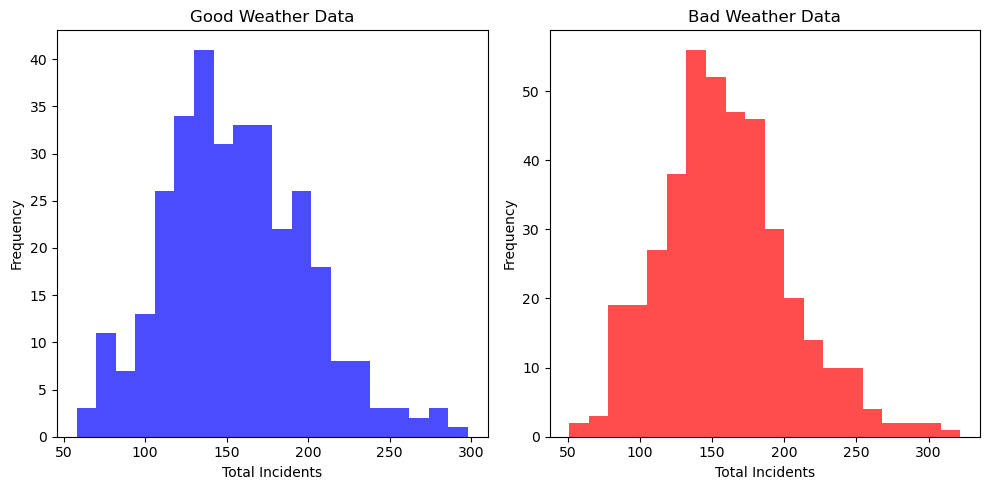

In [133]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt

# Separate the data into good and bad weather groups
good_weather_data = merged_df[merged_df['Weather_Category'] == 'Good']['Total Incidents']
bad_weather_data = merged_df[merged_df['Weather_Category'] == 'Bad']['Total Incidents']

# Plot histograms to visualize the distribution of data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(good_weather_data, bins=20, color='blue', alpha=0.7)
plt.title('Good Weather Data')
plt.xlabel('Total Incidents')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(bad_weather_data, bins=20, color='red', alpha=0.7)
plt.title('Bad Weather Data')
plt.xlabel('Total Incidents')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [134]:
# Perform Shapiro-Wilk test for normality
_, good_weather_pval = shapiro(good_weather_data)
_, bad_weather_pval = shapiro(bad_weather_data)

print("Shapiro-Wilk test for normality:")
print("Good Weather p-value:", good_weather_pval)
print("Bad Weather p-value:", bad_weather_pval)

Shapiro-Wilk test for normality:
Good Weather p-value: 0.005198102444410324
Bad Weather p-value: 0.00020003263489343226


Normality NOT met. Hence, we can try applying bootstrapping technique that doesn't rely on distributional assumptions

In [135]:
# Define a function to calculate the difference in means between two groups
def diff_in_means(data1, data2):
    return np.mean(data1) - np.mean(data2)

# Define the observed difference in means between good and bad weather days
observed_diff = diff_in_means(good_weather_data, bad_weather_data)

# Set the number of bootstrap samples
num_samples = 100000

# Initialize an empty array to store bootstrap sample differences
bootstrap_diffs = np.zeros(num_samples)

# Perform bootstrap sampling
for i in range(num_samples):
    # Sample with replacement from each group
    bootstrap_good_weather = np.random.choice(good_weather_data, size=len(good_weather_data), replace=True)
    bootstrap_bad_weather = np.random.choice(bad_weather_data, size=len(bad_weather_data), replace=True)
    
    # Calculate the difference in means for the bootstrap sample
    bootstrap_diffs[i] = diff_in_means(bootstrap_good_weather, bootstrap_bad_weather)

# Calculate the bootstrap p-value
bootstrap_p_value = np.mean(bootstrap_diffs >= observed_diff)

print("Bootstrap p-value:", bootstrap_p_value)

Bootstrap p-value: 0.49976


Text(0.5, 1.0, 'Histogram of Mean difference for our permutation tests')

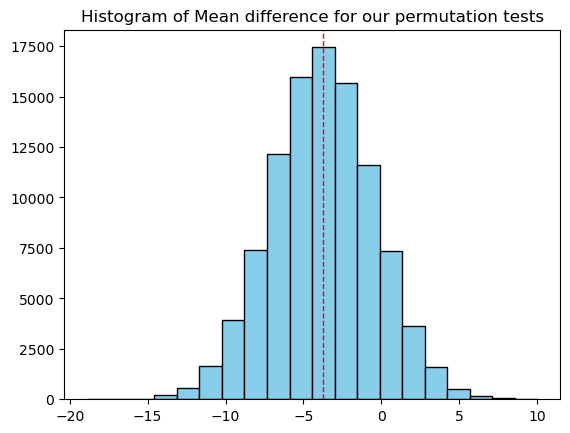

In [136]:
plt.hist(bootstrap_diffs, bins=20, color='skyblue', edgecolor='black')

# Add a vertical line at value mean_dif_orig_value
plt.axvline(x=observed_diff, color='red', linestyle='--', linewidth=1)
plt.title('Histogram of Mean difference for our permutation tests')

A bootstrap p-value of 0.4978 means that approximately 49% of the bootstrap sample differences in means were as extreme as or more extreme than the observed difference in means between good and bad weather days.

Since the bootstrap p-value is relatively high (close to 0.5), it suggests that the observed difference in means between good and bad weather days is not statistically significant. In other words, there is insufficient evidence to reject the null hypothesis that there is no difference in the total incidents of delays between the two weather conditions.

Therefore, based on this analysis, we cannot conclude that there is a statistically significant difference in the total incidents of delays between good and bad weather days.

--------------------------------------------
Lets try to focus only on more extreme wether conditions when defining Bad weather

NOTE: using such approach will led to significant difference in observations of Good and Bad days. Hence, we can use Permutation test. This approach is robust to imbalanced sample sizes and doesn't rely on distributional assumptions.

In [137]:
# Define the conditions for good and bad weather
bad_weather_codes = [53, 63, 73, 81, 55, 57, 65, 67, 75, 77, 82, 86]

# Create a new column to categorize the weather as good or bad
merged_df['Weather_Category_Extreme'] = merged_df['weather_code'].apply(lambda x: 'Bad' if x in bad_weather_codes else 'Good')

In [157]:
# Group the data by the weather category and calculate the total incidents for each category
weather_groups_ex = merged_df.groupby('Weather_Category_Extreme')['Total Incidents'].sum()

# Display the total incidents for good and bad weather
weather_groups_ex

Weather_Category_Extreme
Bad     33509
Good    81405
Name: Total Incidents, dtype: int64

In [158]:
# Group the data by the weather category and calculate the total number of days for each category
weather_days_ex_days = merged_df.groupby('Weather_Category_Extreme').size()

# Display the total incidents for good and bad weather
weather_days_ex_days

Weather_Category_Extreme
Bad     208
Good    522
dtype: int64

In [162]:
good_weather_ex_data = merged_df[merged_df['Weather_Category_Extreme'] == 'Good']['Total Incidents']
bad_weather_ex_data = merged_df[merged_df['Weather_Category_Extreme'] == 'Bad']['Total Incidents']

In [163]:
# Define the observed difference in means between good and bad weather days
observed_diff = np.mean(good_weather_ex_data) - np.mean(bad_weather_ex_data)

# Combine the data from both groups
combined_data = np.concatenate((good_weather_ex_data, bad_weather_ex_data))

# Set the number of permutations
num_permutations = 100000

# Initialize an array to store permutation differences
perm_diffs = np.zeros(num_permutations)

# Perform permutation sampling
for i in range(num_permutations):
    # Shuffle the combined data
    np.random.shuffle(combined_data)
    
    # Split the shuffled data into two groups
    perm_good_weather = combined_data[:len(good_weather_ex_data)]
    perm_bad_weather = combined_data[len(good_weather_ex_data):] #check this thing !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
    
    # Calculate the difference in means for the permutation
    perm_diffs[i] = np.mean(perm_good_weather) - np.mean(perm_bad_weather)

# Calculate the p-value
p_value = np.mean(perm_diffs >= observed_diff)

print("Permutation test p-value:", p_value)

Permutation test p-value: 0.92125


Text(0.5, 1.0, 'Histogram of Mean difference for our permutation tests')

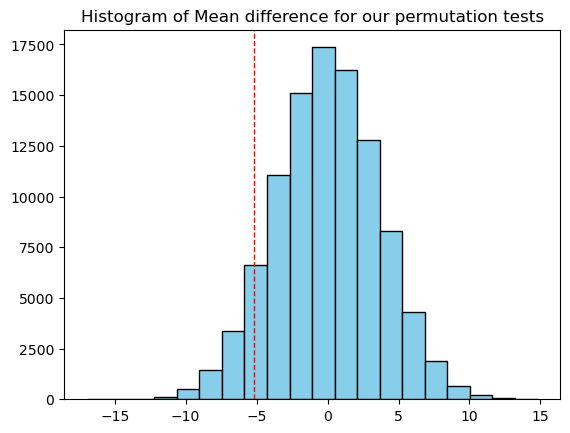

In [164]:
plt.hist(perm_diffs, bins=20, color='skyblue', edgecolor='black')

# Add a vertical line at value mean_dif_orig_value
plt.axvline(x=observed_diff, color='red', linestyle='--', linewidth=1)
plt.title('Histogram of Mean difference for our permutation tests')

There's insufficient evidence to reject the null hypothesis of no difference between the two weather conditions in terms of total incidents of delays. Therefore, based on the results of the permutation test, you cannot conclude that there is a statistically significant difference between good and bad weather days regarding delays.


So even when we focus on more extreme conditions while defining bad weather - there is no statistial difference between bus delays and weather conditions

---------------------------------------------------------


In [170]:
merged_df

,date_from_weather,weather_code,temperature_2m_mean,precipitation_sum,rain_sum,snowfall_sum,precipitation_hours,wind_speed_10m_max,wind_gusts_10m_max,date_from_ttc,...,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision,Total Incidents,Weather_Category,Weather_Category_Extreme
0,2022-01-01 04:00:00+00:00,73.0,2.319333,2.800000,0.400000,1.68,9.0,20.907913,36.000000,2022-01-01,...,0,21,87,1,10,7,1,144,Bad,Bad
1,2022-01-02 04:00:00+00:00,73.0,-6.297333,6.000000,0.000000,4.20,14.0,22.264771,39.239998,2022-01-02,...,0,41,64,1,6,6,1,131,Bad,Bad
2,2022-01-03 04:00:00+00:00,3.0,-9.074418,0.000000,0.000000,0.00,0.0,16.981165,29.160000,2022-01-03,...,0,55,182,5,3,5,0,282,Good,Good
3,2022-01-04 04:00:00+00:00,3.0,-2.722333,0.000000,0.000000,0.00,0.0,21.398056,37.079998,2022-01-04,...,0,36,157,1,9,1,1,226,Good,Good
4,2022-01-05 04:00:00+00:00,51.0,1.611000,0.800000,0.800000,0.00,5.0,35.221176,64.079994,2022-01-05,...,0,48,205,0,17,6,1,298,Bad,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,2023-12-27 04:00:00+00:00,63.0,6.240167,20.000002,20.000002,0.00,19.0,17.253731,31.319998,2023-12-27,...,0,62,70,1,11,5,2,190,Bad,Bad
726,2023-12-28 04:00:00+00:00,53.0,6.121417,3.800000,3.800000,0.00,14.0,15.790833,28.440001,2023-12-28,...,0,55,31,0,13,1,0,143,Bad,Bad
727,2023-12-29 04:00:00+00:00,55.0,5.406834,5.800000,5.800000,0.00,18.0,15.986595,29.879999,2023-12-29,...,0,60,70,1,8,4,0,183,Bad,Bad
728,2023-12-30 04:00:00+00:00,51.0,0.463083,0.200000,0.200000,0.00,2.0,16.965895,30.960001,2023-12-30,...,0,65,60,1,17,7,4,195,Bad,Good


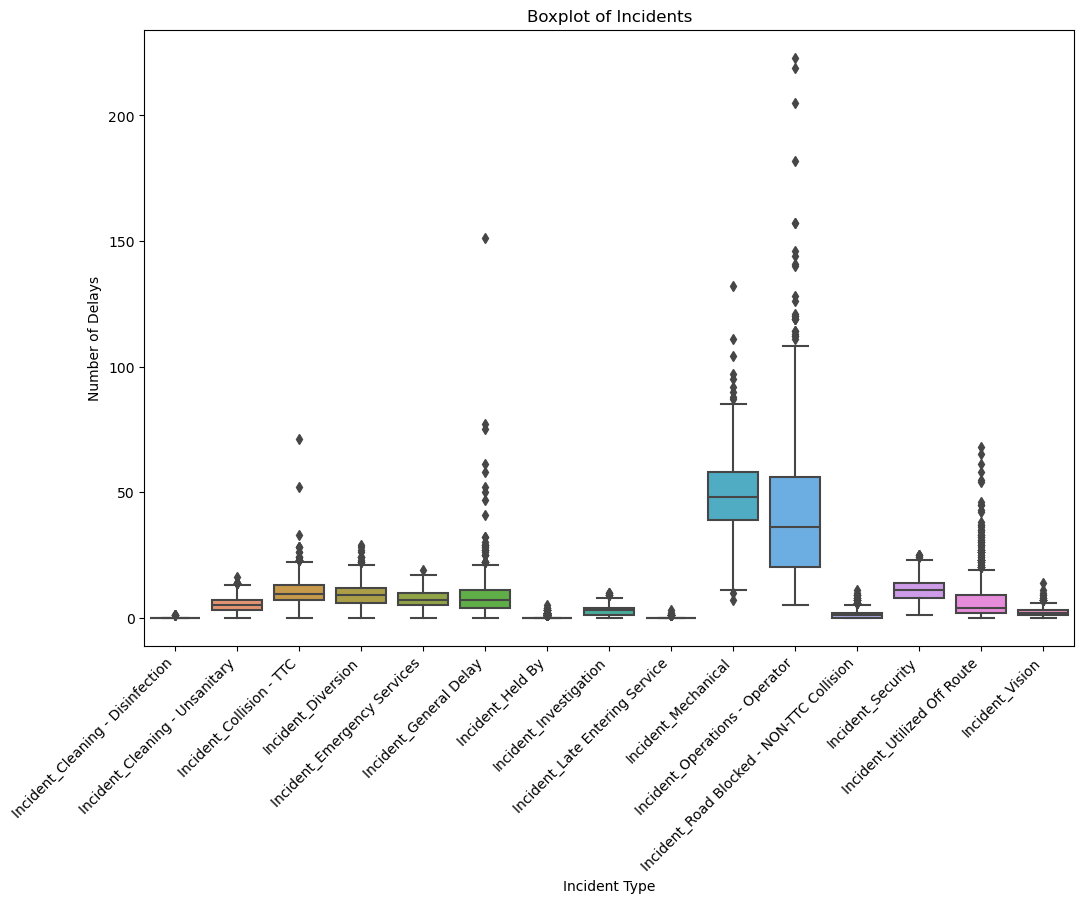

In [171]:
import seaborn as sns

# Define the incident columns
incident_columns = ['Incident_Cleaning - Disinfection',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations - Operator',
       'Incident_Road Blocked - NON-TTC Collision', 'Incident_Security',
       'Incident_Utilized Off Route', 'Incident_Vision']

# Plot boxplots for each incident type
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df[incident_columns])
plt.title('Boxplot of Incidents')
plt.xlabel('Incident Type')
plt.ylabel('Number of Delays')
plt.xticks(rotation=45, ha='right')
plt.show()

it is visible that there are no normality assumption met

In [172]:
# Define the incident columns
incident_columns = ['Incident_Cleaning - Disinfection',
       'Incident_Cleaning - Unsanitary', 'Incident_Collision - TTC',
       'Incident_Diversion', 'Incident_Emergency Services',
       'Incident_General Delay', 'Incident_Held By', 'Incident_Investigation',
       'Incident_Late Entering Service', 'Incident_Mechanical',
       'Incident_Operations - Operator',
       'Incident_Road Blocked - NON-TTC Collision', 'Incident_Security',
       'Incident_Utilized Off Route', 'Incident_Vision']

In [173]:
grouped = merged_df.groupby('Weather_Category')[incident_columns].mean()
grouped

,Incident_Cleaning - Disinfection,Incident_Cleaning - Unsanitary,Incident_Collision - TTC,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision
Weather_Category,,,,,,,,,,,,,,,
Bad,0.00495,5.004950,10.418317,9.076733,7.371287,9.190594,0.301980,2.834158,0.054455,50.844059,41.759901,1.230198,11.408416,7.626238,1.975248
Good,0.01227,5.187117,9.852761,9.266871,7.546012,8.294479,0.358896,3.092025,0.055215,46.512270,43.165644,1.153374,10.957055,7.736196,2.138037


Permutation test for Incident_Cleaning - Disinfection: p-value = 0.41831


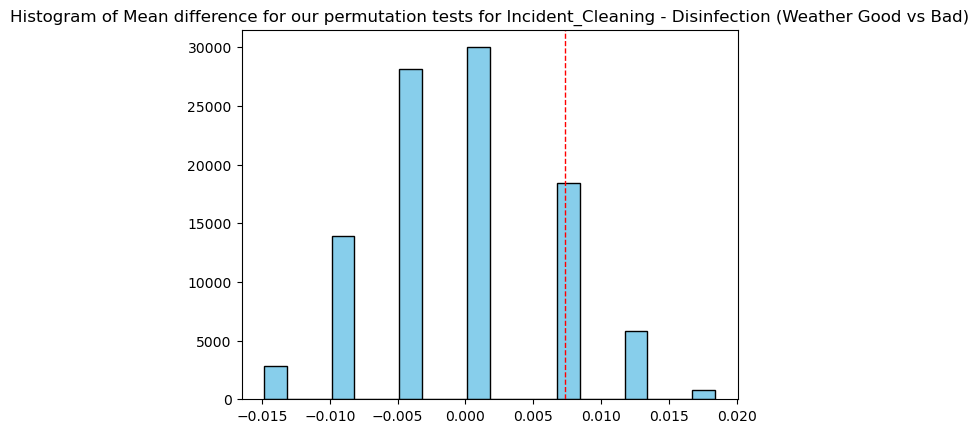

Permutation test for Incident_Cleaning - Unsanitary: p-value = 0.43082


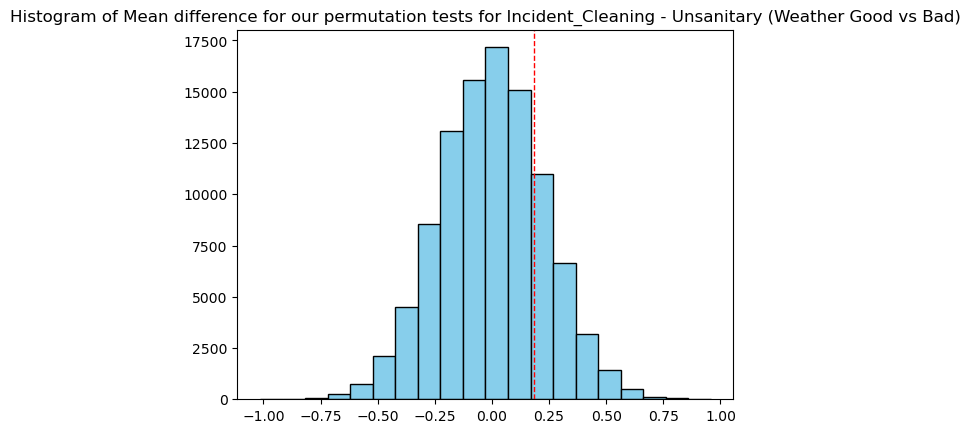

Permutation test for Incident_Collision - TTC: p-value = 0.16454


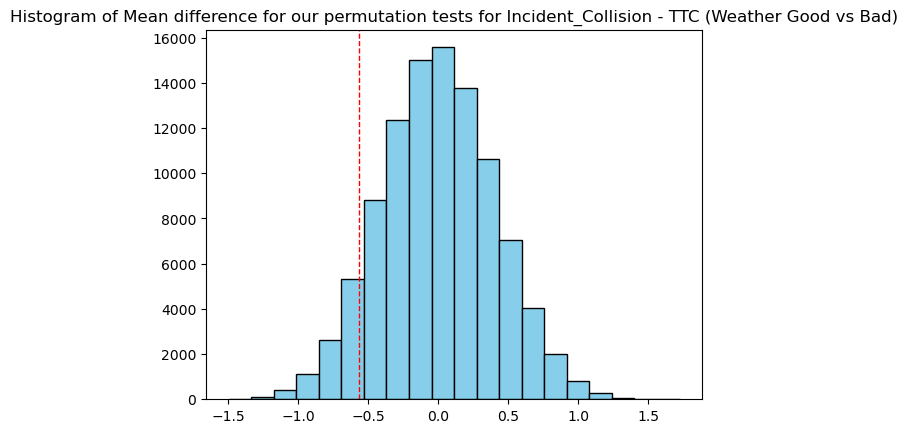

Permutation test for Incident_Diversion: p-value = 0.60114


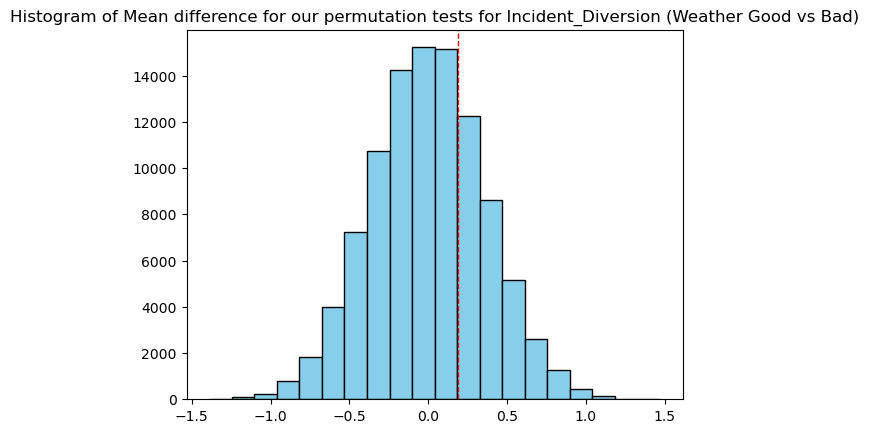

Permutation test for Incident_Emergency Services: p-value = 0.46317


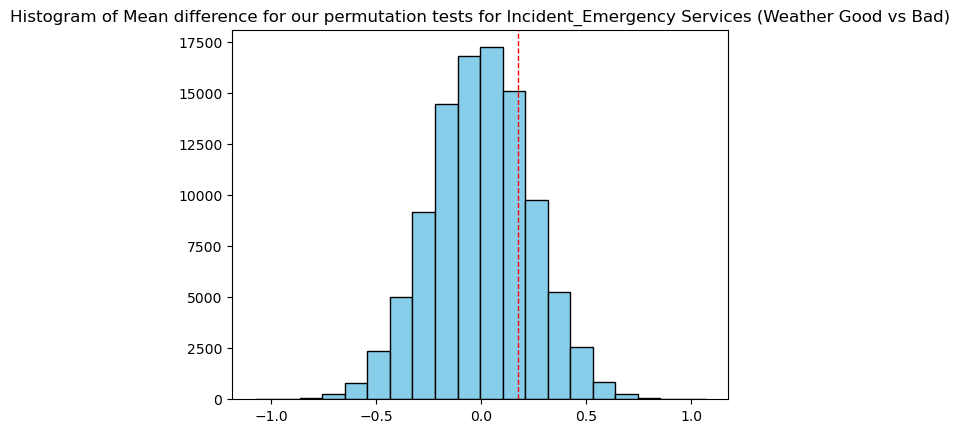

Permutation test for Incident_General Delay: p-value = 0.21101


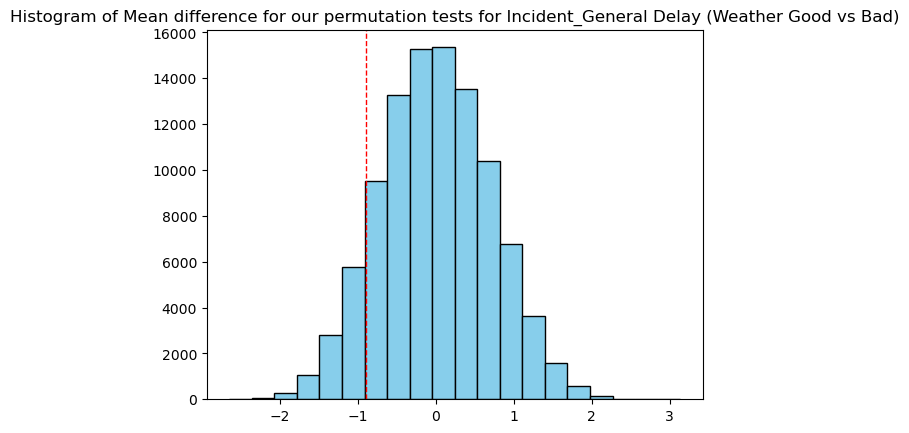

Permutation test for Incident_Held By: p-value = 0.28536


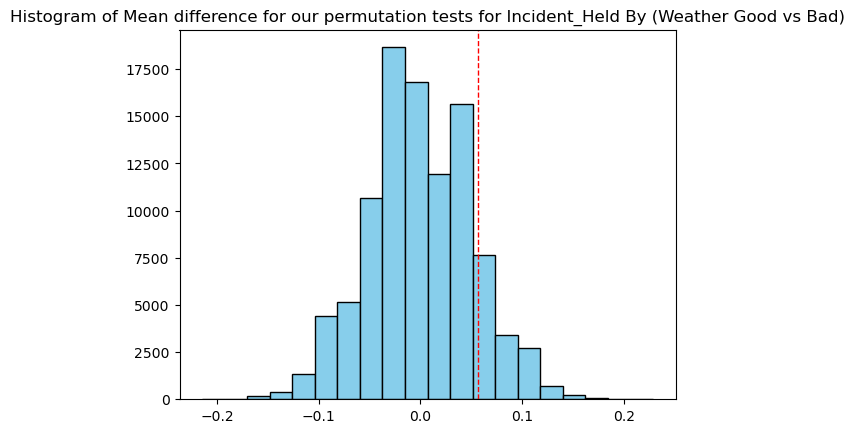

Permutation test for Incident_Investigation: p-value = 0.07322


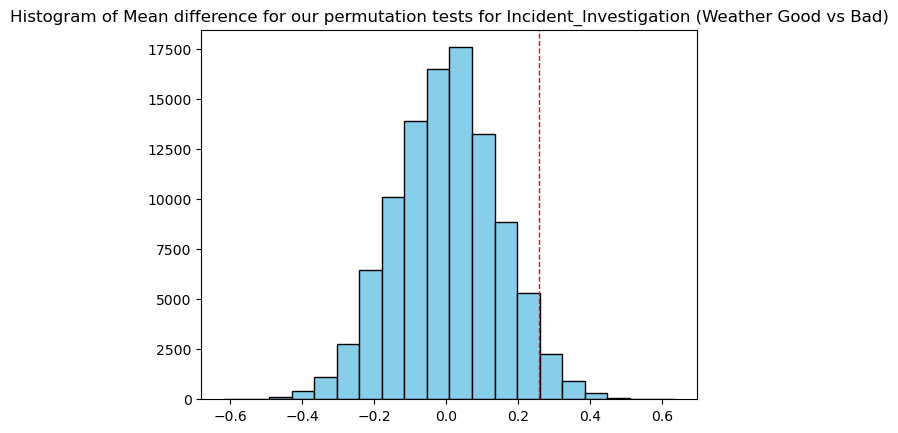

Permutation test for Incident_Late Entering Service: p-value = 1.0


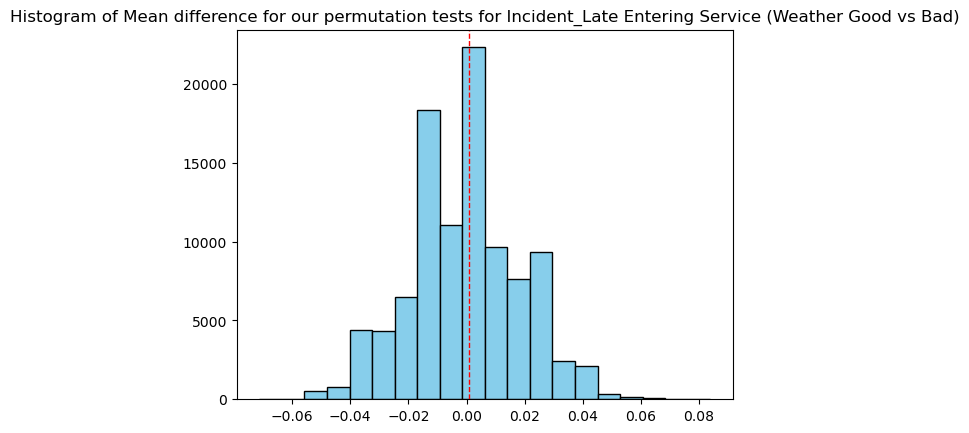

Permutation test for Incident_Mechanical: p-value = 0.0001


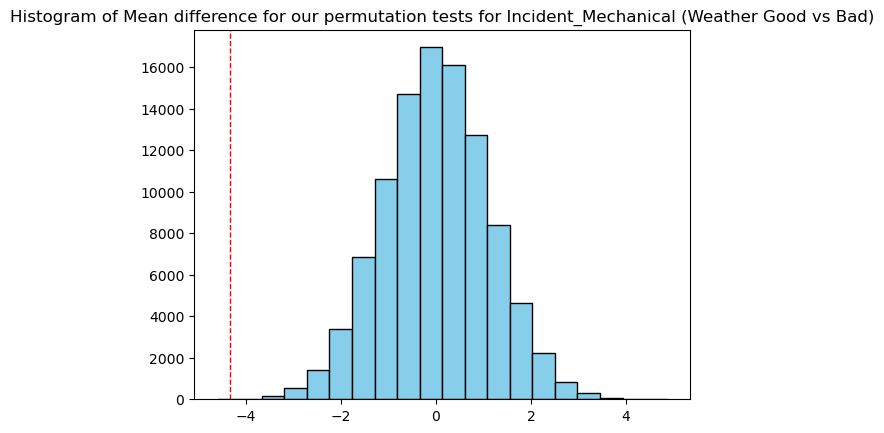

Permutation test for Incident_Operations - Operator: p-value = 0.5255


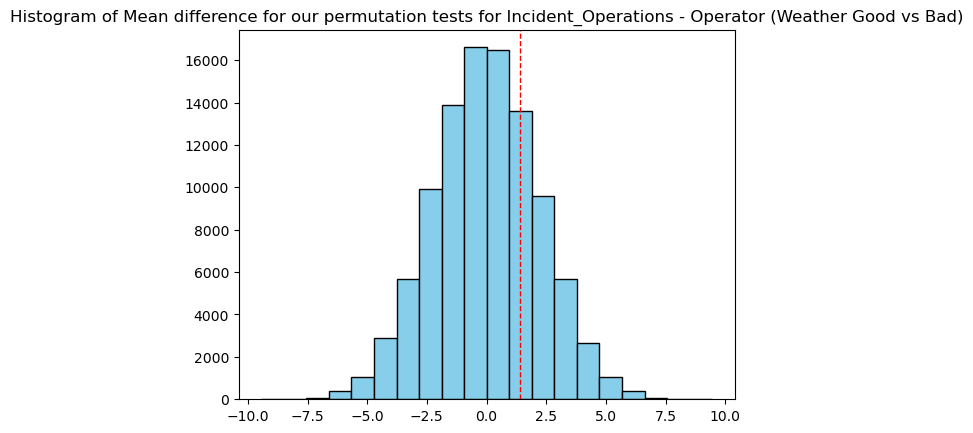

Permutation test for Incident_Road Blocked - NON-TTC Collision: p-value = 0.56081


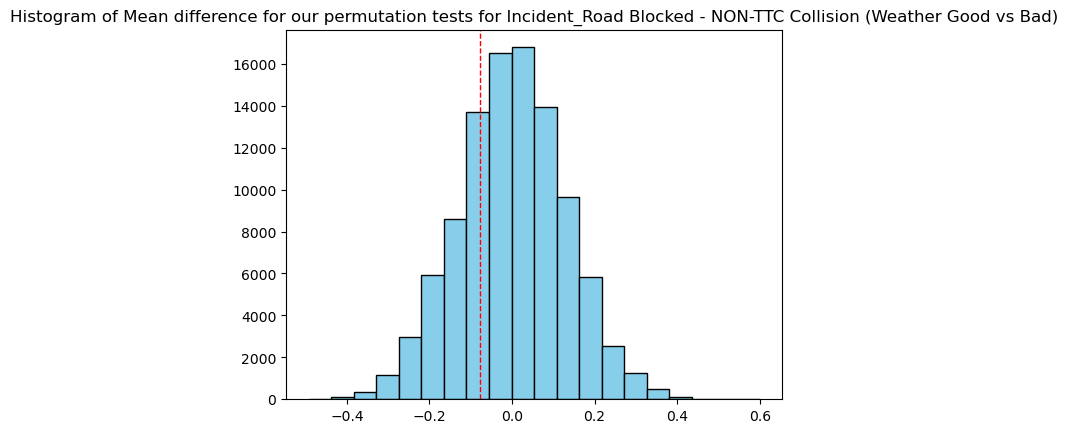

Permutation test for Incident_Security: p-value = 0.16967


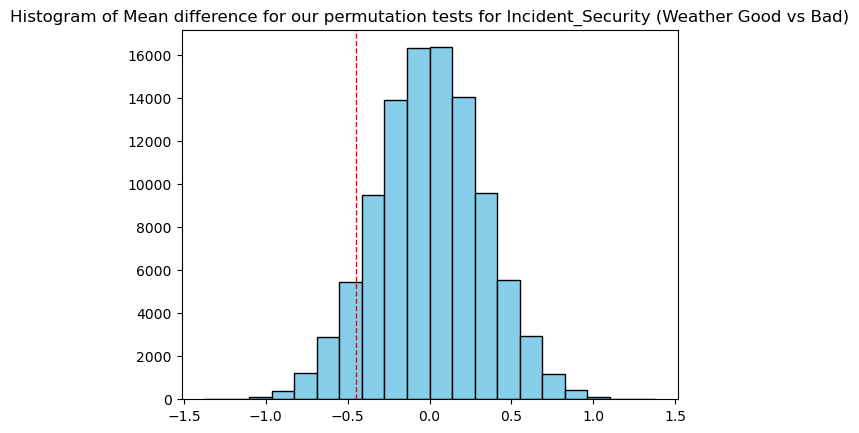

Permutation test for Incident_Utilized Off Route: p-value = 0.87896


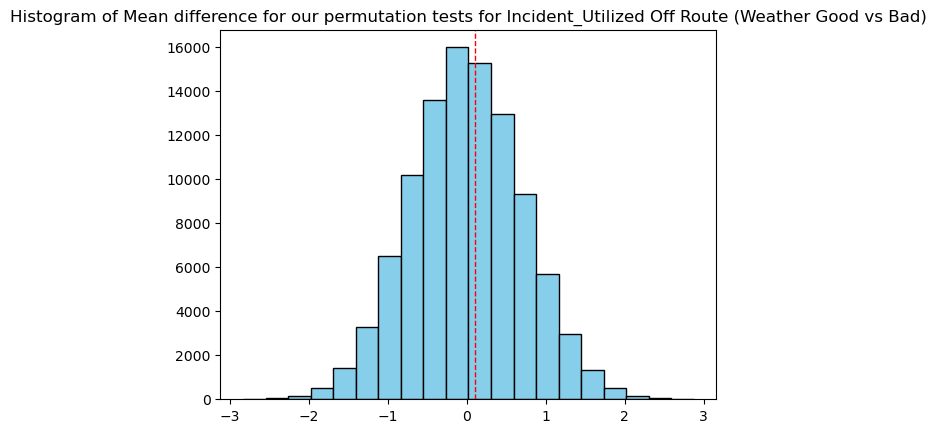

Permutation test for Incident_Vision: p-value = 0.23309


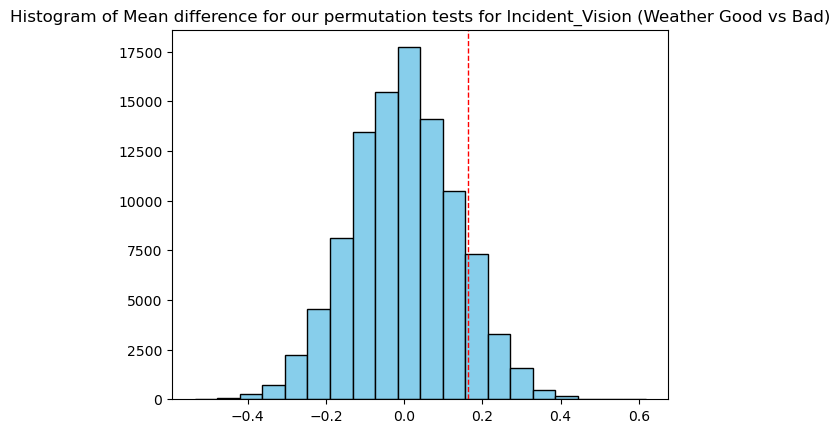

In [174]:
# Perform permutation test for each incident type column
for column in incident_columns:
    good_weather = merged_df[merged_df['Weather_Category'] == 'Good'][column]
    bad_weather = merged_df[merged_df['Weather_Category'] == 'Bad'][column]
    
    # Calculate the observed mean difference
    observed_mean_diff = np.mean(good_weather) - np.mean(bad_weather)
    
    # Combine all data points
    all_data = np.concatenate([good_weather, bad_weather])
    
    # Initialize an array to store permutation test mean differences
    permutation_mean_diffs = []
    
    # Set the number of permutations
    num_permutations = 100000
    
    # Perform permutations and calculate the mean difference for each permutation
    for _ in range(num_permutations):
        np.random.shuffle(all_data)
        permuted_good_weather = all_data[:len(good_weather)]
        permuted_bad_weather = all_data[len(good_weather):]
        permutation_mean_diff = np.mean(permuted_good_weather) - np.mean(permuted_bad_weather)
        permutation_mean_diffs.append(permutation_mean_diff)
    
    # Calculate the p-value as the proportion of permutations with a mean difference more extreme than the observed
    p_value = np.mean(np.abs(permutation_mean_diffs) >= np.abs(observed_mean_diff))
    
    # Print the results
    print(f'Permutation test for {column}: p-value = {p_value}')

    # Plotting results for each column
    plt.figure()  # Create a new figure for each column
    plt.hist(permutation_mean_diffs, bins=20, color='skyblue', edgecolor='black')
    # Add a vertical line at value mean_dif_orig_value
    plt.axvline(x=observed_mean_diff, color='red', linestyle='--', linewidth=1)
    plt.title(f'Histogram of Mean difference for our permutation tests for {column} (Weather Good vs Bad)')

    plt.show()  # Display all plots

In [175]:
grouped = merged_df.groupby('Weather_Category_Extreme')[incident_columns].mean()
grouped

,Incident_Cleaning - Disinfection,Incident_Cleaning - Unsanitary,Incident_Collision - TTC,Incident_Diversion,Incident_Emergency Services,Incident_General Delay,Incident_Held By,Incident_Investigation,Incident_Late Entering Service,Incident_Mechanical,Incident_Operations - Operator,Incident_Road Blocked - NON-TTC Collision,Incident_Security,Incident_Utilized Off Route,Incident_Vision
Weather_Category_Extreme,,,,,,,,,,,,,,,
Bad,0.004808,4.908654,11.062500,9.370192,7.283654,10.682692,0.336538,2.677885,0.072115,52.355769,40.908654,1.245192,11.254808,6.932692,2.004808
Good,0.009579,5.157088,9.808429,9.078544,7.515326,8.036398,0.323755,3.057471,0.047893,47.536398,42.977011,1.176245,11.187739,7.971264,2.065134


Permutation test for Incident_Cleaning - Disinfection: p-value = 0.67854


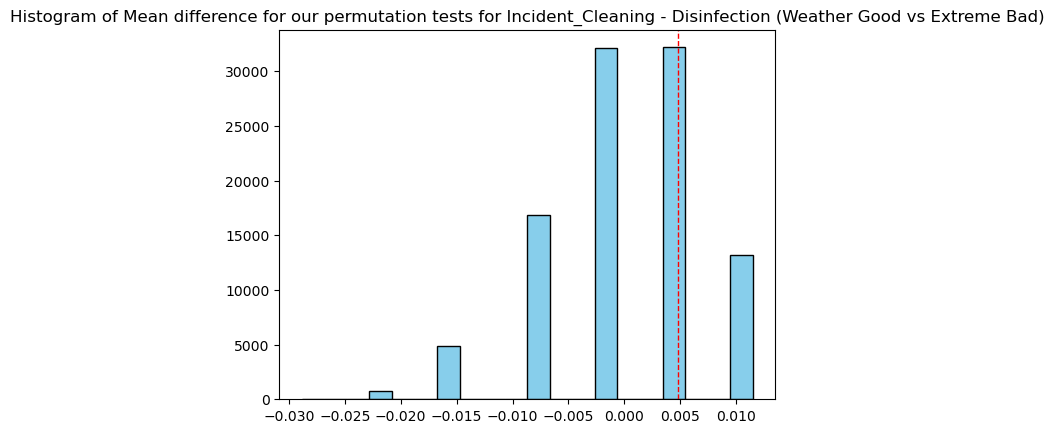

Permutation test for Incident_Cleaning - Unsanitary: p-value = 0.32495


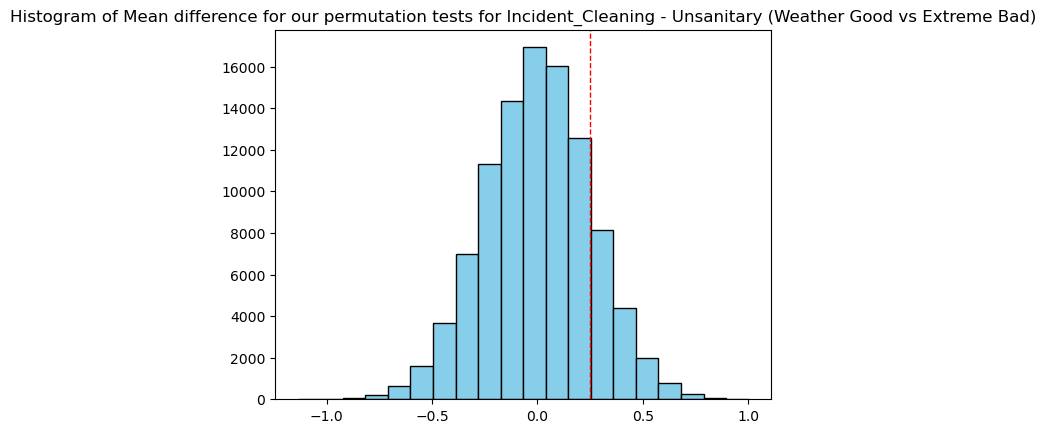

Permutation test for Incident_Collision - TTC: p-value = 0.00478


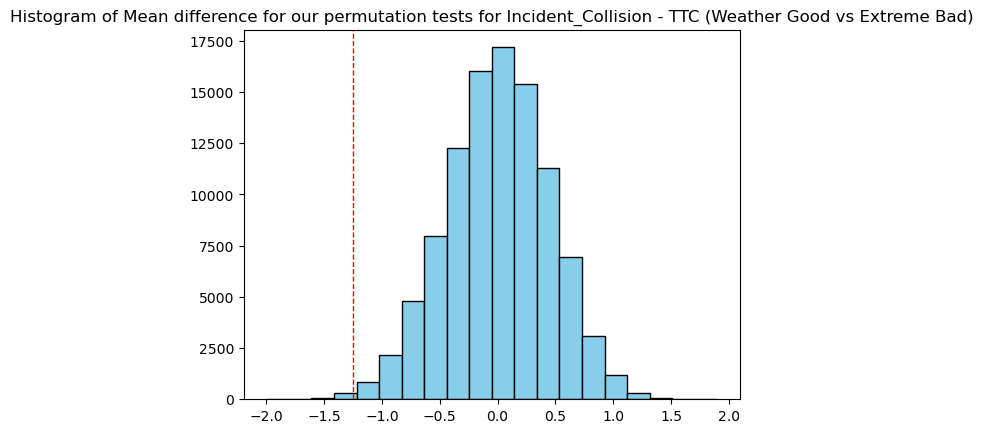

Permutation test for Incident_Diversion: p-value = 0.46411


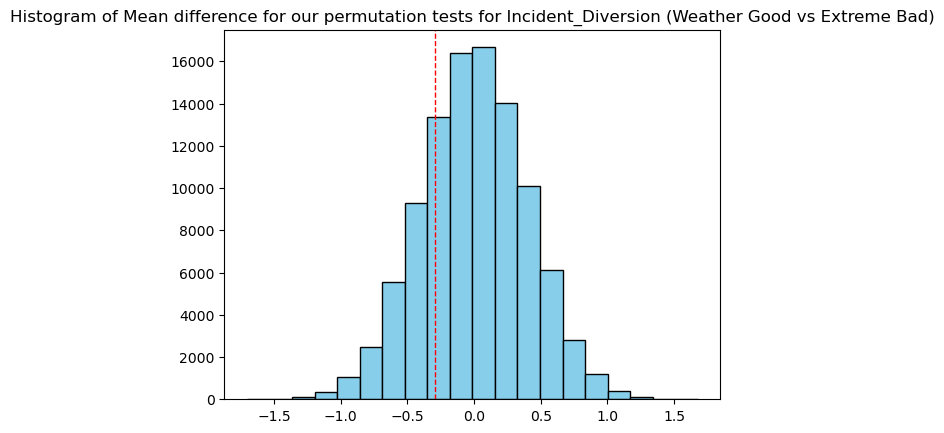

Permutation test for Incident_Emergency Services: p-value = 0.38256


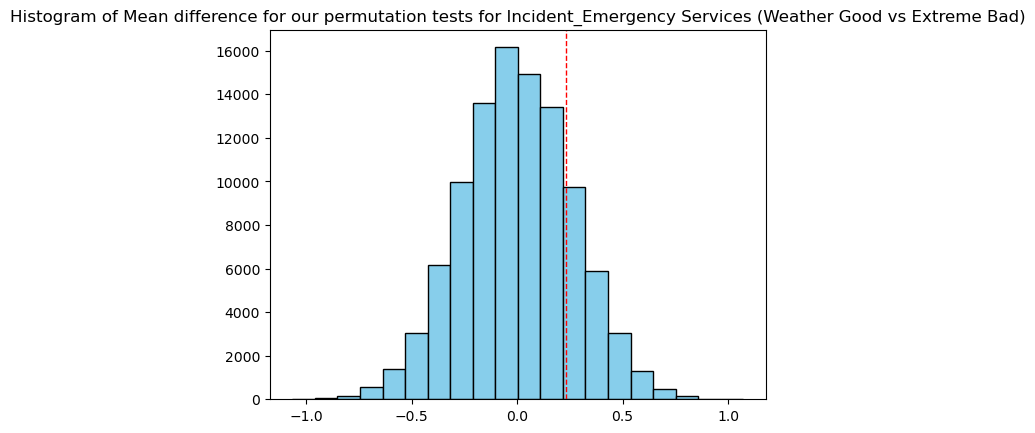

Permutation test for Incident_General Delay: p-value = 0.00057


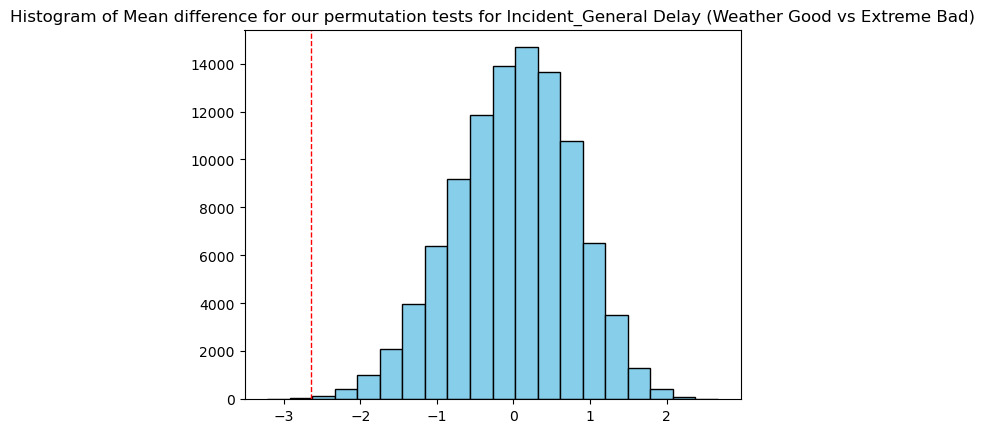

Permutation test for Incident_Held By: p-value = 0.8614


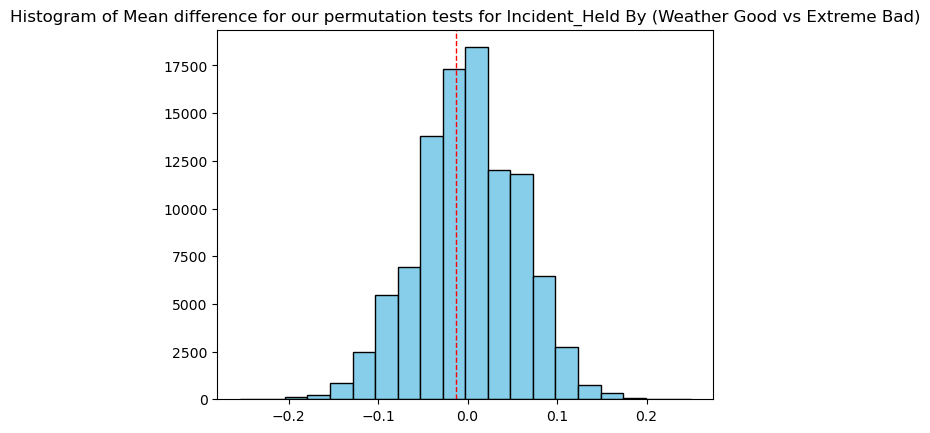

Permutation test for Incident_Investigation: p-value = 0.01684


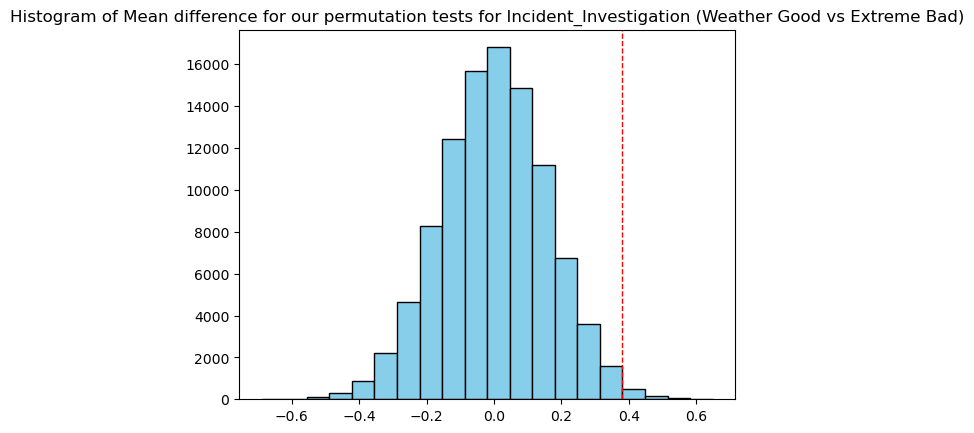

Permutation test for Incident_Late Entering Service: p-value = 0.26229


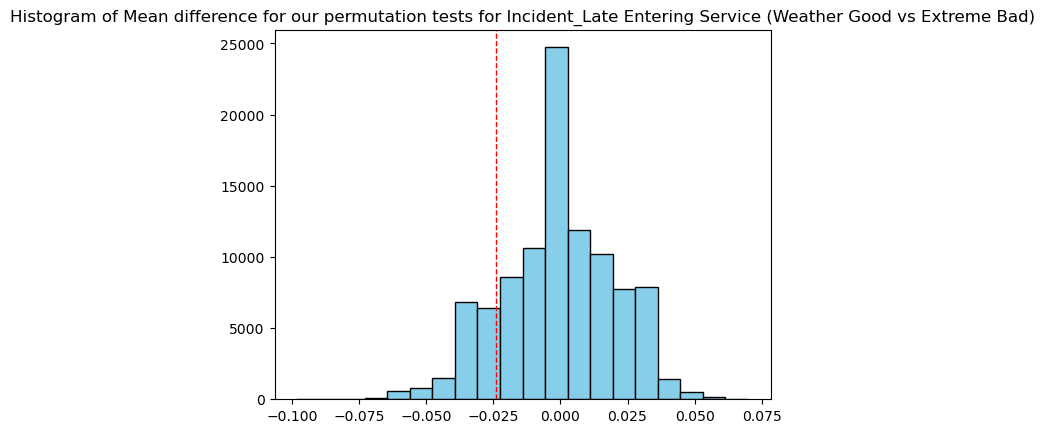

Permutation test for Incident_Mechanical: p-value = 0.00015


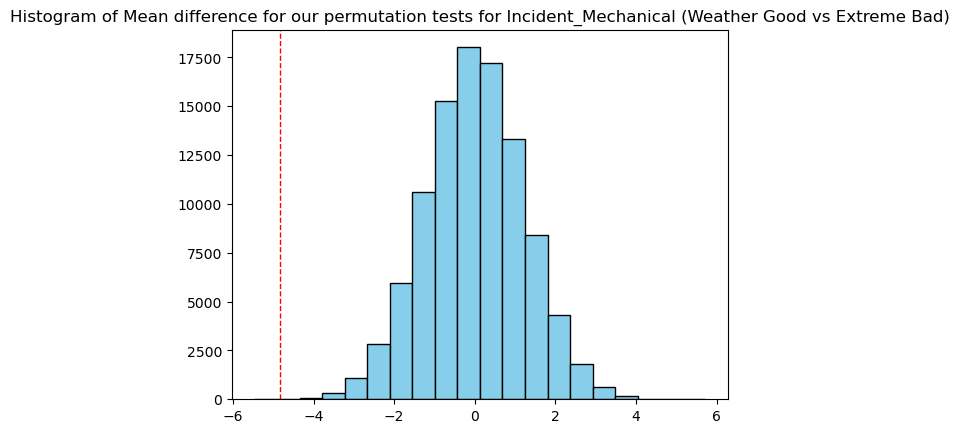

Permutation test for Incident_Operations - Operator: p-value = 0.39692


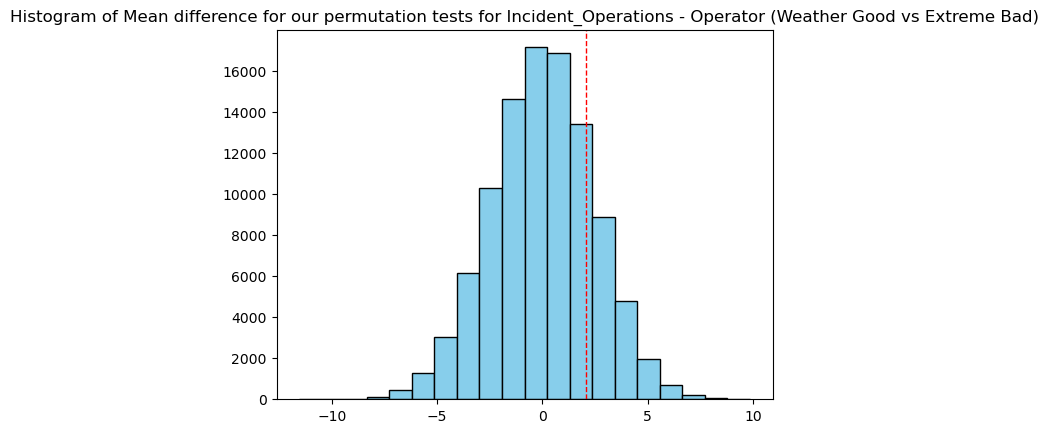

Permutation test for Incident_Road Blocked - NON-TTC Collision: p-value = 0.63616


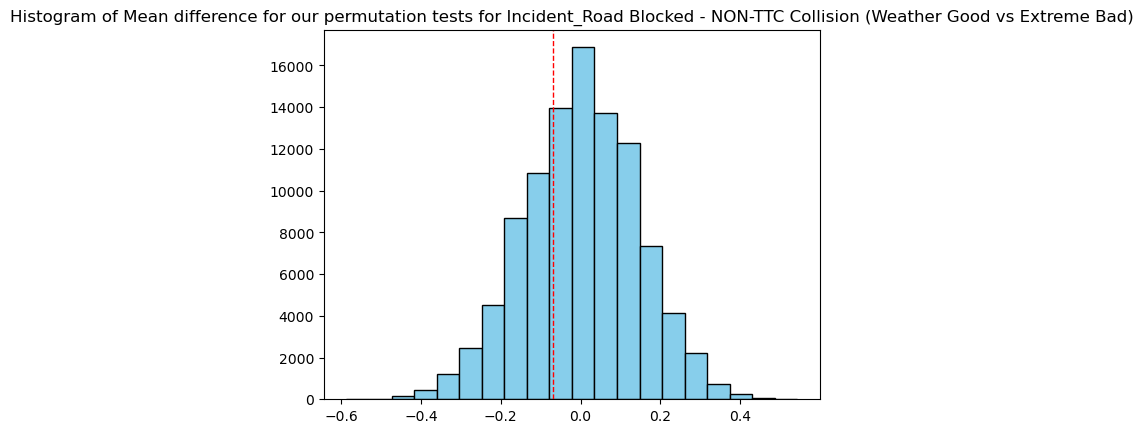

Permutation test for Incident_Security: p-value = 0.85906


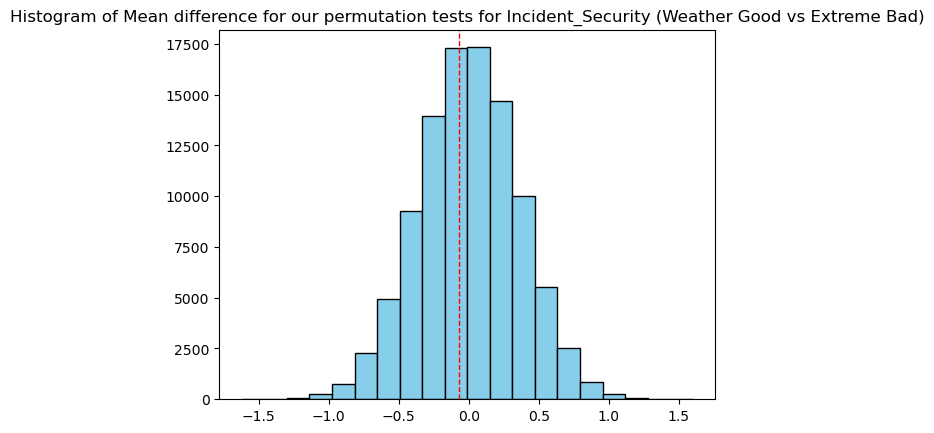

Permutation test for Incident_Utilized Off Route: p-value = 0.1827


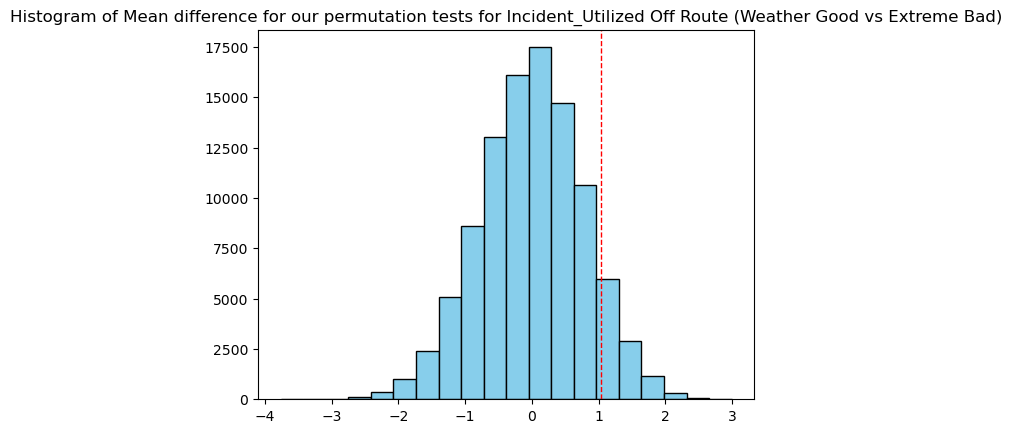

Permutation test for Incident_Vision: p-value = 0.70006


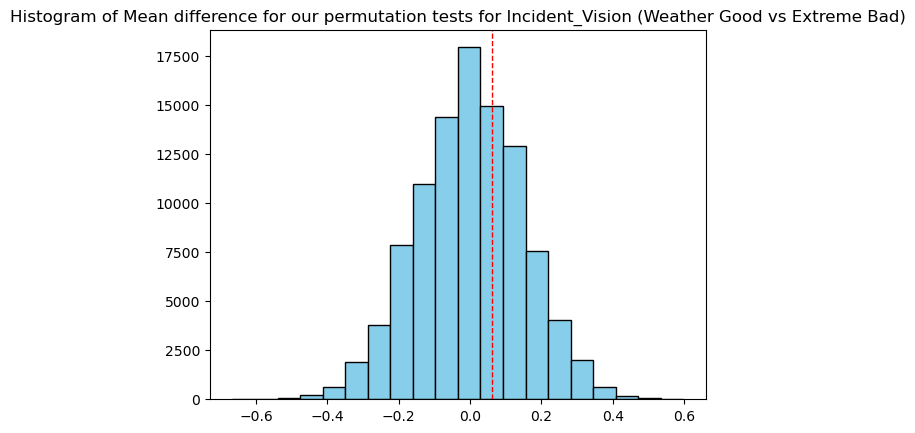

In [176]:
# permutation test is better to use in our case

# Perform permutation test for each incident type column
for column in incident_columns:
    good_weather = merged_df[merged_df['Weather_Category_Extreme'] == 'Good'][column]
    bad_weather = merged_df[merged_df['Weather_Category_Extreme'] == 'Bad'][column]
    
    # Calculate the observed mean difference
    observed_mean_diff = np.mean(good_weather) - np.mean(bad_weather)
    
    # Combine all data points
    all_data = np.concatenate([good_weather, bad_weather])
    
    # Initialize an array to store permutation test mean differences
    permutation_mean_diffs = []
    
    # Set the number of permutations
    num_permutations = 100000
    
    # Perform permutations and calculate the mean difference for each permutation
    for _ in range(num_permutations):
        np.random.shuffle(all_data)
        permuted_good_weather = all_data[:len(good_weather)]
        permuted_bad_weather = all_data[len(good_weather):]
        permutation_mean_diff = np.mean(permuted_good_weather) - np.mean(permuted_bad_weather)
        permutation_mean_diffs.append(permutation_mean_diff)
    
    # Calculate the p-value as the proportion of permutations with a mean difference more extreme than the observed
    p_value = np.mean(np.abs(permutation_mean_diffs) >= np.abs(observed_mean_diff))
    
    # Print the results
    print(f'Permutation test for {column}: p-value = {p_value}')

    # Plotting results for each column
    plt.figure()  # Create a new figure for each column
    plt.hist(permutation_mean_diffs, bins=20, color='skyblue', edgecolor='black')
    # Add a vertical line at value mean_dif_orig_value
    plt.axvline(x=observed_mean_diff, color='red', linestyle='--', linewidth=1)
    plt.title(f'Histogram of Mean difference for our permutation tests for {column} (Weather Good vs Extreme Bad)')

    plt.show()  # Display all plots

**to analyze results here we need to correct our alpha value by using Bonferroni correction. Corrected alpha value will be 0.05/15**